# -*- coding: utf-8 -*-
"""
PCA_heart_disease_prediction_exercise_solution.ipynb

This notebook demonstrates the application of Principal Component Analysis (PCA) on the heart disease dataset
for dimensionality reduction and subsequent application of a RandomForest classifier for prediction.

Dataset source: https://www.kaggle.com/fedesoriano/heart-failure-prediction
"""


In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
data_path = "/content/drive/MyDrive/0.Latest_DS_Course/USL/PCA/Data/heart.csv"

In [83]:

import pandas as pd

In [84]:

# Load the heart disease dataset
df = pd.read_csv(data_path)

In [85]:


# Display the first few rows of the dataset to understand its structure
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [86]:
# Check the shape of the dataset (rows, columns)
df.shape

(918, 12)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [88]:

# Get descriptive statistics of the dataset (mean, std, min, etc.)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# --------------------------
# Handle Outliers
# --------------------------

In [89]:

# Identifying outliers in the 'Cholesterol' column using a 3-sigma rule
df[df.Cholesterol > (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [90]:
# The shape remains the same initially
df.shape

(918, 12)

In [91]:

# Remove outliers where 'Cholesterol' exceeds the 3-sigma rule threshold
df1 = df[df.Cholesterol <= (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]
df1.shape  # Shape of the dataset after removing cholesterol outliers

(915, 12)

In [92]:
# Identifying outliers in 'MaxHR' (maximum heart rate achieved) using the 3-sigma rule
df[df.MaxHR > (df.MaxHR.mean() + 3 * df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [93]:
# Identifying outliers in 'FastingBS' (fasting blood sugar) using the 3-sigma rule
df[df.FastingBS > (df.FastingBS.mean() + 3 * df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [94]:


# Identifying outliers in 'Oldpeak' (ST depression induced by exercise) using the 3-sigma rule
df[df.Oldpeak > (df.Oldpeak.mean() + 3 * df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [95]:
# Remove outliers from 'Oldpeak'
df2 = df1[df1.Oldpeak <= (df1.Oldpeak.mean() + 3 * df1.Oldpeak.std())]
df2.shape  # Shape of the dataset after removing Oldpeak outliers

(909, 12)

In [96]:
# Identifying outliers in 'RestingBP' (resting blood pressure)
df[df.RestingBP > (df.RestingBP.mean() + 3 * df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [97]:
# Remove outliers from 'RestingBP'
df3 = df2[df2.RestingBP <= (df2.RestingBP.mean() + 3 * df2.RestingBP.std())]
df3.shape  # Shape after removing RestingBP outliers

(902, 12)

# --------------------------
# Categorical Feature Encoding
# --------------------------

In [98]:
# View unique values of the 'ChestPainType' categorical feature
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [99]:
# View unique values of the 'RestingECG' categorical feature
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [100]:

# View unique values of the 'ExerciseAngina' categorical feature
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [101]:
# View unique values of the 'ST_Slope' categorical feature
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [102]:
# Make a copy of the filtered dataset to start encoding categorical variables
df4 = df3.copy()

In [103]:

# Encode 'ExerciseAngina': 'N' -> 0, 'Y' -> 1
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

# Encode 'ST_Slope': 'Down' -> 1, 'Flat' -> 2, 'Up' -> 3
df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

# Encode 'RestingECG': 'Normal' -> 1, 'ST' -> 2, 'LVH' -> 3
df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

<ipython-input-103-a55c02905e1d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4.ExerciseAngina.replace(
<ipython-input-103-a55c02905e1d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4.ExerciseAngina.replace(
<ipython-input-103-a55c02905e1d>:10: FutureWarning: A value is trying to be set 

In [104]:

# View the dataset after encoding
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [105]:
# Convert other categorical columns to dummy variables (one-hot encoding) and drop the first column to avoid multicollinearity
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,True,True,False,False
1,49,160,180,0,1,156,0,1.0,2,1,False,False,True,False
2,37,130,283,0,2,98,0,0.0,3,0,True,True,False,False
3,48,138,214,0,1,108,1,1.5,2,1,False,False,False,False
4,54,150,195,0,1,122,0,0.0,3,0,True,False,True,False


# --------------------------
# Split Features and Target
# --------------------------


In [106]:

# Separate the dataset into features (X) and target variable (y)
X = df5.drop("HeartDisease", axis='columns')  # Features
y = df5.HeartDisease  # Target (Heart Disease: 0 or 1)


In [107]:

# Display the first few rows of the features
X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,True,True,False,False
1,49,160,180,0,1,156,0,1.0,2,False,False,True,False
2,37,130,283,0,2,98,0,0.0,3,True,True,False,False
3,48,138,214,0,1,108,1,1.5,2,False,False,False,False
4,54,150,195,0,1,122,0,0.0,3,True,False,True,False


# --------------------------
# Feature Scaling
# --------------------------

In [108]:
from sklearn.preprocessing import StandardScaler

# Standardize the features to have mean=0 and variance=1 for better performance of PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit the scaler on the data and transform

# Check the scaled features
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

# --------------------------
# Train-Test Split
# --------------------------

In [109]:
from sklearn.model_selection import train_test_split

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

# Check the shape of the training set
X_train.shape

# Check the shape of the testing set
X_test.shape

(181, 13)

# --------------------------
# Train a Random Forest Model
# --------------------------

In [110]:

from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest classifier on the training set
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Check the model accuracy on the test set
model_rf.score(X_test, y_test)

0.861878453038674

In [111]:
X_train.shape

(721, 13)

# --------------------------
# PCA for Dimensionality Reduction
# --------------------------

In [112]:
# from sklearn.decomposition import PCA

# # Apply PCA to reduce dimensions, keeping 95% of the explained variance
# pca = PCA(0.99)
# X_pca = pca.fit_transform(X)  # Fit PCA on the features and transform

# # Check the transformed features after PCA
# X_pca

# # Split the PCA-reduced data into training and testing sets
# X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [113]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions, keeping 95% of the explained variance
pca = PCA(3)
X_pca = pca.fit_transform(X)  # Fit PCA on the features and transform

# Check the transformed features after PCA
X_pca

# Split the PCA-reduced data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [114]:
X_pca.shape

(902, 3)

In [115]:
X_pca

array([[ 93.82465373,  29.40099458,  11.5858984 ],
       [-15.58422331,  14.10909233,  31.680368  ],
       [ 83.29606634, -38.6867453 , -15.39992052],
       ...,
       [-67.57318721, -17.61319354,  -4.35202042],
       [ 40.70458237,  33.38750602,   5.99332666],
       [-19.91368346,  37.29085722,  13.31321738]])

In [116]:
X_train_pca


array([[ 144.17179253,   27.81069659,   -7.35209488],
       [-198.05650036,   -1.60170119,   -8.28847517],
       [  58.29652612,   -0.74381021,  -13.12742399],
       ...,
       [  17.17807633,   30.09505665,   -4.65420912],
       [-198.4591464 ,   -2.32709091,  -17.75754507],
       [  92.49957929,   -3.38670354,   26.31312315]])

In [117]:
pca.explained_variance_ratio_

array([0.92010766, 0.05065984, 0.02357532])

## **Percentage of variance explained by individual components**

In [118]:
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio * 100:.2f}%")

PC1: 92.01%
PC2: 5.07%
PC3: 2.36%


##**Cummulative Variance explained by PCs**

In [119]:
pca.explained_variance_ratio_.cumsum()*100

array([92.01076561, 97.07674927, 99.43428105])

## Plotting individual and cummulative cotributions of PCs

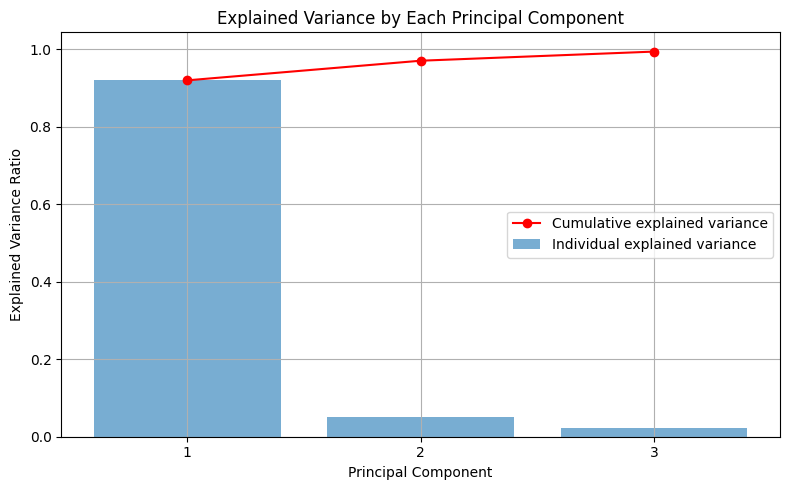

In [120]:
import matplotlib.pyplot as plt

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

 using `PCA(0.99)` means we're keeping enough components to explain **99% of the variance**

###  What This Shows:
- **Bars** show how much variance each principal component captures individually.
- The **red line** shows how the variance accumulates as more components are added.



# --------------------------
# Train Random Forest Model on PCA-reduced Data
# --------------------------

In [121]:

# Train a RandomForest classifier on the PCA-reduced training set
model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)

# Check the model accuracy on the PCA-reduced test set
model_rf.score(X_test_pca, y_test)


0.7016574585635359